# Extensive Analysis of Kaggle DS & ML Survey 2019
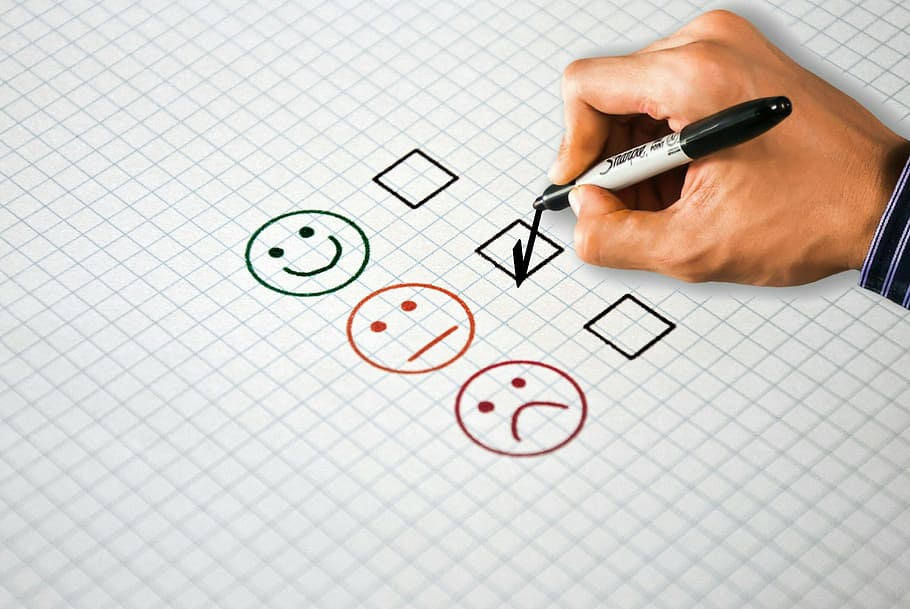
## <a id='main'>Table of Contents</a>
- [Questions asked in the suvey](#ques)
- [How much time was taken to complete the survey?](#time)
- [Demographics of the Respondants](#demo)
- [Education of the Respondants](#edu)
- [Let's talk about career!](#career)
- [Data Science Reporters](#rep)

## <a id='ques'>Question asked in the survey</a>
[Go back to the main page](#main)

A Survey was conducted by Kaggle from October 8th to October 28th to know the state of Data Science and Machine Learning. This survey received 19,717 usable respondents from 171 countries and territories. Now, lets analyse what type of questions were asked in the survey and how many respondants answered those questions. We know that not every question was shown to every respondants so the number of respondants might vary per question.

![](http://)Let's list the input directory first.

In [ ]:
#List the Input Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

The input directory contains 4 files. To know the type of questions asked we will refer to the *survey_schema.csv*. Below are the libraries which will be used all throughout the notebook.

In [ ]:
#Libraries to be imported
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['fivethirtyeight'])
import seaborn as sns

Now, we will read the file with the help of pandas and then output first five rows of the dataset to get to know it's structure.

In [ ]:
df_schema = pd.read_csv('/kaggle/input/kaggle-survey-2019/survey_schema.csv')
df_schema.head()  

Since, we are focusing on the questions and it's number of respondants we will just worry about the first row and the columns of the dataset.

In [ ]:
ques_nos = np.arange(1,35,1) #An array representing the question numbers
cols = list(map(str, ['Q' + str(ques_no) for ques_no in ques_nos])) #To get the question wise counts
df_schema = df_schema[cols].iloc[0:2,:] #Just select the number of respondants
df_schema = df_schema.transpose()
df_schema[1] = df_schema[1].astype(int)
df_schema.reset_index(inplace=True)
df_schema.rename(columns={'index':'Question_no', 0:'Question_txt', 1:'no_of_respondants'}, inplace=True)
df_schema.head()

In [ ]:
plt.figure(figsize=(35,22))
ax = sns.barplot(x='Question_txt', y='no_of_respondants', data=df_schema)
ax.set_title('Number of Respondants per Question', fontsize=30)
ax.set_xlabel('Questions', fontsize=20)
ax.set_ylabel('No. of Respondants', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(int(height)), (x - 0.05, y + height + 100))
plt.tight_layout()
plt.show()

From the above plot we can see that in total 34 questions were asked of which not all questions were answered by every respondants. Following is some more analysis:-
- Questions about age, gender and country were shown to all of the 19,717 respondants.
- "Which of the following machine learning frameworks you use on a regular basis?" is the question least responded to or we can say it was shown to least number of respondants i.e. 3582.
- Looking at the trend, it can be seen that more generic questions were asked to large number of respondants compared with more specific questions. 

## <a id='time'>How much time was taken to complete the survey?</a>
[Go back to the main page](#main)

Let's analyse how the respondants fared when it came to the time to complete the survey. For further analysis I'll use the *multiple_chpice_responses.csv* file.

In [ ]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv', low_memory=False)
df.head()

Let's draw a boxplot representation of a boxplot to study the distribution of time taken to complete the survey.

In [ ]:
#Distribution of Time
times = df.iloc[1:,0].reset_index(drop=True)
times = times.astype(int)
plt.figure(figsize=(20,4))
ax = sns.boxplot(x=times)
ax.set_title('Distribution of Time taken to complete the survey', fontsize=20)
plt.show()

As can be seen from the above boxplot, there is a large number of outliers with someone taking more than 200 hours to complete a survey(Why would anyone take that long :p)
Let's get rid of the outliers and then analyse the distribution.

In [ ]:
print('Average time taken to complete the survey: {} seconds'.format(np.mean(times)))
print('Median time taken to complete the survey: {} seconds'.format(np.median(times)))

In [ ]:
#Removing the outliers
Q1 = np.percentile(times, 25) #25th percentile
Q3 = np.percentile(times, 75) #75th percentile
IQR = Q3 - Q1 #Inter-quartile range
times = times[times < (Q3 + 1.5*IQR)]
plt.figure(figsize=(20,4))
ax = sns.boxplot(x=times)
ax.set_title('Distribution of Time taken to complete the survey (After removing outliers)', fontsize=20)
plt.show()

Now we get a better understanding of the time. Mostly people have completed the survey in below 20 minutes.

## <a id='demo'>Demographics of the Respondants</a>
[Go back to the main page](#main)

Since, all the responands have answered the questions about their age, gender and the country in which they reside we can easily study the demographics of the respondants.

In [ ]:
#Removing the question
df = df.iloc[1:,:].reset_index(drop=True)
df.head()

In [ ]:
#Just select the age, gender and country
pd.set_option('mode.chained_assignment', None)
df1 = df.iloc[:,[1,2,4]]
df1.rename(columns={'Q1':'age_group', 'Q2':'gender', 'Q3':'country'}, inplace=True)
df1.head()

In [ ]:
plt.figure(figsize=(20,12))
ax = sns.countplot(y='age_group', hue='gender', data=df1)
ax.set_title('Age Group wrt Gender', fontsize=30)
ax.set_ylabel('Age Group', fontsize=20)
ax.set_xlabel('Count', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(width), (x + width + 5 , y + 0.15), fontsize=14)
plt.legend(loc=1, prop={'size': 16})
plt.tight_layout()
plt.show()

The following are the insights gathered from the above grouped barplot:-
- There are 11 age groups namely *22-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 64-69 & 70+*.
- Clearly, there are more male respondants than female respondants from all age groups.
- The most number of respondants are from the age group 25-29 be it male or female. Infact people in their 20s have been the majority respondants to the survey. This can be attributed the fact that DS & ML has become quite famous in the past decade and is the hottest skill nowadays.  
- Although not 100% sure but through this survey we can say that males are more interested in the field of data science than females.

In [ ]:
plt.figure(figsize=(20,8))
ax = df1['country'].value_counts()[:20].plot(kind='barh')
ax.set_title('No. of Respondants per Country(Top 20)', fontsize=30)
ax.set_xlabel('No. of Respondants', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
#For annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(width), (x + width + 10 , y), fontsize=14)
plt.show()

The most number of respondants have been from India i.e almost one-third of all the respondants followed by USA. It's great to see Nigeria in the list of top 20 nations. 

## <a id='edu'>Education of the Respondants</a>
[Go back to the main page](#main)

In this section, I'm going to analyse the highest level of education attained by the respondants. I believe that people getting into the field of data science are usually bachelors or masters. Let's see if my preconception is right or wrong.

In [ ]:
def draw_pie_chart(df, figsize, explode_list, colors_list, title, subplots=False):
    """This Function can be used to draw a customizable pie chart for a dataframe. """
    df.plot(kind='pie', 
            subplots=subplots,
            figsize=figsize,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,         # turn off labels on pie chart
            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct
            colors=colors_list,  # add custom colors
            explode=explode_list # 'explode' lowest 4 degrees
           )
    # scale the title up by 15% to match pctdistance
    plt.title(title, y=1.15) 
    plt.axis('equal') 
    # add legend
    plt.legend(labels=df.index, loc='lower right',fontsize=8)
    plt.yticks([])#To turn-off the y-axis label
    plt.show()

In [ ]:
explode_list = [0, 0, 0, 0.1, 0.2, 0.3, 0.4] # ratio for each continent with which to offset each wedge.
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#c2c2cc']

In [ ]:
draw_pie_chart(df['Q4'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Highest level of Formal Education')
draw_pie_chart(df[df['Q2']=='Female']['Q4'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Highest level of Formal Education(Females)')
draw_pie_chart(df[df['Q2']=='Male']['Q4'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Highest level of Formal Education(Males)')

My preconception was right! Most of the respondants have either a Master's or a Bacherlor's degree. The same trend continues for males and females as well.

Let's see how Indians fare when it comes to the education. Do they follow the global trend? or do they follow something completely different?

In [ ]:
draw_pie_chart(df[(df['Q2']=='Male') & (df['Q3']=='India')]['Q4'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Highest level of Formal Education(Indian Males)')
draw_pie_chart(df[(df['Q2']=='Female') & (df['Q3']=='India')]['Q4'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Highest level of Formal Education(Indian Females)')

The Indian males and females show the same global trend. 
> In case of Indian females the number respondants with master's degree are almost equal to the one with bachelor's degree.

Let's bring age into consideration and use seaborn's facet grid to use gender as a facet and using type of degree as hue to get more granular insights.

In [ ]:
df2 = df.loc[:,['Q1','Q2','Q4']]
df2.rename(columns={'Q1':'AgeGroup', 'Q2':'Gender', 'Q4':'Degree'}, inplace=True)
df2 = df2[(df2['Gender']=='Male') | (df2['Gender']=='Female')]
ax = sns.FacetGrid(df2, col ='Gender', hue = 'Degree', height = 6, aspect=1)
ax.map(sns.countplot,'AgeGroup', order=df2.AgeGroup.unique()).add_legend()
ax.set_xticklabels(fontsize=8)
plt.show()

Though it is following the usual trend but I got the following insights:-
- All people in the age group 18-21 are doing a bachelor's degree or studying in a university/college.
- Usually people take up masters after the age of 25. It means they believe in order to pursue master's, they should have some kind of experience under their belt.
- Take a look at age group 22-24, females are much more likely to pursue master's than males in this age group.

## <a id='career'>Let's talk about career!</a>
[Go back to the main page](#main)

Since, this is a survey on Data Science and Machine Learning, I believe most of the respondants would be from a technical background: Data Scientist, Data Analyst, Business Analyst, Software engineers e.t.c. Let's just see if I have got my intuition right.

In [ ]:
df_salary = df.loc[:,['Q5','Q6','Q10']]
df_salary.rename(columns={'Q5':'Job', 'Q6':'No_of_employees', 'Q10':'Salary'}, inplace=True)
df_salary.dropna(how='all', axis=0, inplace=True) #Remove the rows containing all the null values
df_salary.head()

In [ ]:
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4] # ratio for each continent with which to offset each wedge.
colors_list = ['#ff9999','#66b3ff','#39ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#c2c8cc', '#9ff999', '#ffcccc', '#7713ff', '#8883ff', '#1cb3e6']
draw_pie_chart(df_salary['Job'].value_counts(), (20,6), explode_list, colors_list, 'Distribution of Jobs of the respondants')

- From the pie chart, we can conclude that all the respondants are from a technical background, be it a student or a Statistician. Student is a wide category although I believe most would be science students or associated to mathematics/statistics in someway.
- Data Scientist are the majority respondants(21.4%) of the survey along with Students(21.0%) who are also not lagging behind. It's interesting to see Software Engineers(14.2%), maybe most of them are like me who are interested in the field of Data Science and Machine Learning :P.
- Even non-employed people(4.9%) have responded to the survey. 

In [ ]:
#Incresing order of salaries
order = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999','15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','250,000-299,999','> $500,000']

def draw_countplot(df, figsize, job):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x='Salary', data=df, order=order)
    ax.set_title(job + ' Salary distribution', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_yticks(np.arange(0,401,50))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{}'.format(int(height)), (x + 0.1, y + height + 2), fontsize=15)
    plt.tight_layout()
    plt.show()

I have heard a lot that Data Scientist is the hottest paying job in the world currently. Let's see how do the Data Scientist fare against the Data Analysts, Business Analysts and the Software Engineers of the world. Although it's a small subset but still it can be a representative of the general trend.

In [ ]:
jobs = ['Data Scientist', 'Data Analyst', 'Business Analyst', 'Software Engineer']
for job in jobs:
    draw_countplot(df_salary[df_salary['Job'] == job], (20,4), job)

- It can be seen as the salary increases the number of individuals in that salary group also decreses.
- Although the Data Scientists are quite large in number when it comes to the survey respondants but they do have higher salaries compared with that of a Data Analyst, Business Analyst or a Software Engineer. There are a lot of Data Scientist in the salary range 10,000 to 200,000 dollars.

Let's also study how the salaries of various roles vary with respect to the company size. 

In [ ]:
employee_order = ['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '> 10,000 employees']
g = sns.FacetGrid(df_salary, col ='No_of_employees', hue = 'Salary', col_wrap = 3,col_order = employee_order, hue_order = order, height = 5, aspect=1)
g.map(sns.countplot,'Job', order=df_salary.Job.unique()).add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Salary & Job with respect to number of employees', fontsize=14) 
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_ha('right')
        label.set_fontsize(8)
plt.show()

> In the above plot we can the companies with employees below 50 people show a show large numbers of people in these technical roles. This can be attributed to the fact that the range of number of employees 0-49 make up the majority of the dataset.

Also, we can notice that as the size of the company increase the people in all these roles(Data Scientist, Data Analyst, e.t.c) tend to get higher salaries. This implies that all these roles are high paying jobs in a company. 

## <a id='rep'>Data Science Reporters</a>
[Go back to the main page](#main)

Whenever I want to study something related to Data Science, I go to Coursera, kaggle or medium. Let's see what are the famous Data Science Reporters in the world.

In [ ]:
def get_all_answers(df, column, filter_dict, columns):
    """Get all the answer counts by sending in the question number and also filter values based upon the dictionary"""
    if filter_dict:
        for clm, val in filter_dict.items():
            df = df[df[clm]==val]
    d = {}
    cols = [col for col in df.columns if column + '_Part' in col]
    for col in cols:
        d[' '.join(map(str, df[col].value_counts().index.tolist()))] = df[col].value_counts()[0]
    df_ans = pd.DataFrame(list(d.items()), columns=columns)
    df_ans.set_index(df_ans.columns[0], inplace=True)
    return df_ans

In [ ]:
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4, 0] # ratio for each reporter of Data Science
colors_list = ['#ff9999','#66b3ff','#39ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#c2c8cc', '#9ff999', '#ffcccc', '#7713ff', '#8883ff', '#1cb3e6']
columns = ['Media Sources reporting on Data Science', 'Counts']

In [ ]:
df_rep = get_all_answers(df, 'Q12', {}, columns=columns)
draw_pie_chart(df_rep, (20,5), explode_list, colors_list, 'Data Science Reporters', subplots=True)

- Kaggle seems to the number one choice all over the world when it comes to Data Science and Machine Learning.
- Blogs sites such as Towards Data Science, Medium, Analytics Vidhya, KDnuggets, etc are a close competitor to Kaggle. These are really good blog sites even I read a lot of blogs on them. 
- Course forums make up a meager 7.3% share of all the reporters. It can be attributed the fact that the courses offered over these forums are paid and people are not that interested to spend their money on learning something.

Let's see which reporters are generally used by Indians.

In [ ]:
df_rep = get_all_answers(df, 'Q12', {'Q3':'India'}, columns=columns)
draw_pie_chart(df_rep, (20,5), explode_list, colors_list, 'Data Science Reporters(India)', subplots=True)

> Seems like Indians are also following the global trend. 

Let's also see what reporters Data Scientists all over the world use. Do they use something different or do they also follow the same trend ?

In [ ]:
df_rep = get_all_answers(df, 'Q12', {'Q5':'Data Scientist'}, columns=columns)
draw_pie_chart(df_rep, (20,5), explode_list, colors_list, 'Data Science Reporters(Data Scientist)', subplots=True)

Data Scientists are also following the same global trend. So, as a whole the above are the reporters of Data Science through which you can acquire knowledge about DS and ML.